In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [23]:
df = pd.read_csv('Social_Network.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [24]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [27]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [28]:
df.dropna(inplace= True)

In [29]:
df.drop_duplicates(inplace= True)

In [30]:
df.shape

(400, 5)

In [31]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [32]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int32

In [34]:
X = df.drop(columns= 'Purchased')
Y = df['Purchased']

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.2, random_state=2)

In [36]:
model = DecisionTreeClassifier(max_depth = 2)

In [37]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2)

In [38]:
y_pred1 =  model.predict(xtest)

[Text(0.5, 0.8333333333333334, 'x[2] <= 42.5\ngini = 0.453\nsamples = 320\nvalue = [209, 111]'),
 Text(0.25, 0.5, 'x[3] <= 89500.0\ngini = 0.265\nsamples = 229\nvalue = [193, 36]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.07\nsamples = 193\nvalue = [186.0, 7.0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.313\nsamples = 36\nvalue = [7, 29]'),
 Text(0.75, 0.5, 'x[2] <= 46.5\ngini = 0.29\nsamples = 91\nvalue = [16, 75]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.231\nsamples = 75\nvalue = [10, 65]')]

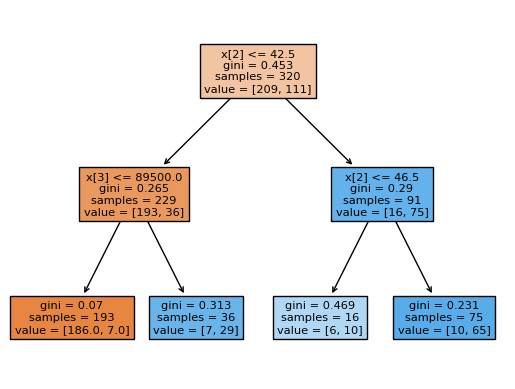

In [39]:
from sklearn import tree
tree.plot_tree(model, filled= True)

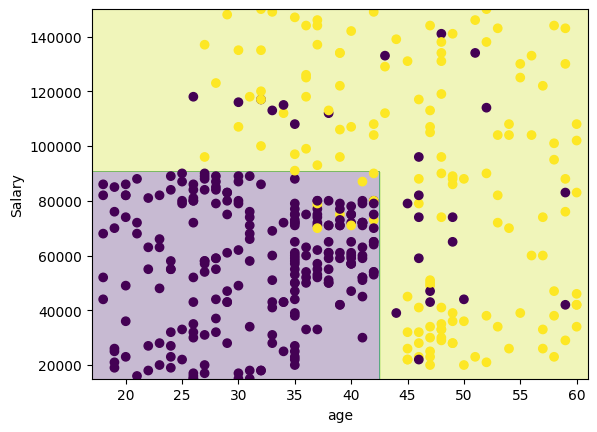

In [40]:
X = np.array(df.drop(columns= 'Purchased'))
Y = np.array(df['Purchased'])

model.fit(X[:,2:4], Y)

x_min, x_max = X[:,2].min()-1 , X[:,2].max()+1
y_min, y_max = X[:,3].min()-1 , X[:,3].max()+1

xx , yy = np.meshgrid(np.linspace(x_min,x_max, 500),
                    np.linspace(y_min,y_max, 500))

y_pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

plt.contourf(xx, yy, y_pred, alpha=0.3)
plt.scatter(X[:,2], X[:,3], c=Y)
plt.xlabel('age')
plt.ylabel('Salary')
plt.show()

In [42]:
from sklearn.metrics import classification_report

report_of_classifier = classification_report(ytest, y_pred1, output_dict= True)
report_of_classifier = pd.DataFrame(report_of_classifier).transpose()
report_of_classifier

,precision,recall,f1-score,support
0,0.977778,0.916667,0.946237,48.0000
1,0.885714,0.968750,0.925373,32.0000
accuracy,0.937500,0.937500,0.937500,0.9375
macro avg,0.931746,0.942708,0.935805,80.0000
weighted avg,0.940952,0.937500,0.937891,80.0000


In [60]:
from sklearn.metrics import confusion_matrix

confuse_matrix = confusion_matrix(ytest, y_pred1)
confuse_matrix

array([[44,  4],
       [ 1, 31]], dtype=int64)

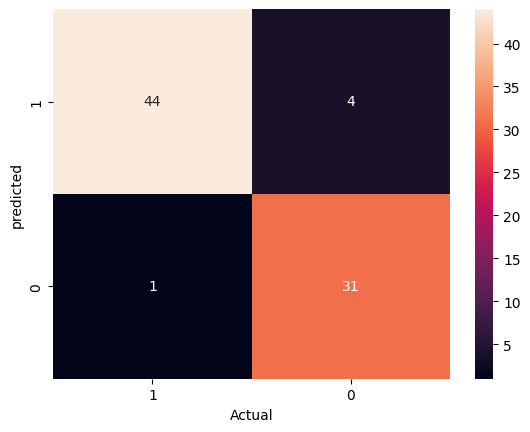

In [57]:
import seaborn as sns

sns.heatmap(confuse_matrix, xticklabels= [1,0], yticklabels= [1,0], annot= True)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()